In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

params = {'text.latex.preamble':[r'\usepackage{amsmath}',
                                 r'\usepackage{amssymb}',
                                 r'\usepackage{xparse}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{siunitx}',
                                 r'\sisetup{detect-all}',
                                 r'\usepackage{helvet}'
                                 r'\usepackage{sansmath}',
                                 r'\sansmath']}
plt.rcParams.update(params)

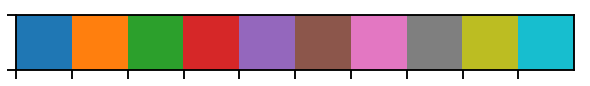

In [9]:
sns.palplot(sns.color_palette())

C:\Users\reyalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


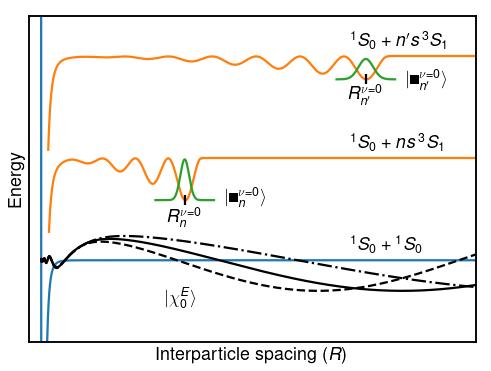

In [10]:
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(8,6))

cp = sns.color_palette()
c6 = 3250 # a.u.
m = 84
rvdw = (2*m/2*1836*c6)**(1/4) # a.u.
r0 = -0.25 # a.u.
potential = lambda r: 5/(r-r0)**12 - 10/((r-r0))**6

rr = 4
k = lambda k0,r: np.sqrt(k0**2 - 2*potential(r))
wfn = lambda k0,r: np.sqrt(k0)*np.cos(2*np.pi* k(k0,r) * r )/(np.sqrt(k(k0,r)))
wfn = lambda k0,r: np.sqrt(np.sqrt(k0))*np.cos(2*np.pi* k(k0,r) * r )/np.sqrt(np.sqrt(k(k0,r)))*(1-np.exp(-r/rr))

rydberg_wfn = lambda r,a,linscale,w,e0,c4: e0 -  a*(r/linscale)**2*np.sin(2*np.pi*w*r)**2 - c4/r**4

nu_0 = lambda r, a, rn, sigma, yn: a*np.exp(-(r-rn)**2/(2*sigma**2))+yn

r = np.linspace(0,100,20000)
scale=0.15
k0=0.01

###################################
# Scattering potential and wave functions

# Potential: 1S0 + 1S0
plt.plot(r, potential(r), color=cp[0])
plt.text(s=r'${}^{1}{S}_{0} + {}^{1}{S}_{0}$', x=43,y=0.04)

# Sattering wave functions
plt.plot(r, scale*wfn(k0,r), color = 'k')
plt.plot(r, scale*wfn(k0+0.003,r), color = 'black', linestyle = '--')
plt.plot(r, scale*wfn(k0-0.003,r), color = 'black', linestyle = '-.')
plt.text(s=r'$\ket*{\chi_0^E}$', x = 20, y = -0.2, ha='center',va='center')

###################################
# ULRRM nu=0 wave function 1

a = .05
w = 1/12
e0 = 1
c4 = 3
linscale = 30
shift = 2.5
nperiod = 8
ryd_r = np.linspace(1.6,nperiod/2/w+0.04,1000)
rn = nperiod/2/w-1/4/w
rn2 = rn
yn = rydberg_wfn(rn,a,linscale,w,e0,c4)

nu_width = 4
r_nu = np.linspace(rn-nu_width,rn+nu_width,1000)
a_nu = 0.1
sigma_nu = 1
offset_nu = 0

plt.plot(ryd_r, rydberg_wfn(ryd_r, a, linscale, w, e0, c4), color = cp[1])
plt.hlines(e0, xmin = ryd_r[-1], xmax = 100, color = cp[1])
plt.text(s=r'${}^{1}{S}_{0} + {n^{\prime} s}{\,}^{3}{S}_{1}$', x = 43, y = e0 + 0.04)

plt.plot(r_nu, nu_0(r_nu, a_nu, rn, sigma_nu, yn), color = cp[2])
plt.text(s=r'$\ket*{\Psi_{n^\prime}^{\nu=0}}$', x = rn + 8.5, y = e0 - 0.13, ha='center',va='center')

plt.vlines(rn, ymin = yn - 0.025, ymax= yn + 0.025, color='k', linestyle='-', zorder=1001)
plt.text(s=r'$R_{n^{\prime}}^{\nu=0}$', x = rn, y = yn - 0.09, ha='center', va='center')

###################################
# ULRRM nu=0 wave function 2

a = .05
w = 1/9
e02 = .5
c4 = 3
linscale = 10
shift = 2.5
nperiod = 5
ryd_r = np.linspace(1.7,nperiod/2/w+0.04,1000)
rn = nperiod/2/w-1/4/w
yn = rydberg_wfn(rn,a,linscale,w,e02,c4)

r_nu = np.linspace(rn-nu_width,rn+nu_width,1000)
a_nu = 0.2
sigma_nu = 0.6

plt.plot(ryd_r, rydberg_wfn(ryd_r, a, linscale, w, e02, c4), color = cp[1])
plt.hlines(e02, xmin = ryd_r[-1], xmax = 100, color = cp[1])
plt.text(s=r'${}^{1}{S}_{0} + {n s}{\,}^{3}{S}_{1}$', x = 43,y = e02 + 0.04)

plt.plot(r_nu, nu_0(r_nu, a_nu, rn, sigma_nu, yn), color = cp[2])

plt.text(s=r'$\ket*{{\Psi}_{n}^{\nu=0}}$', x = rn + 8.5, y = yn, ha = 'center', va = 'center')

plt.vlines(rn, ymin = yn - 0.025, ymax = yn + 0.025, color = 'black', zorder = 1000)
plt.text(s=r'$R_{n}^{\nu=0}$', x = rn, y = yn - 0.1, ha = 'center', va = 'center')

###################################
# Plot options

plt.xlim(-1, 60)
plt.ylim(-0.4, 1.2)
plt.xlabel(r'Interparticle spacing ($R$)')
plt.ylabel(r'Energy')
#plt.yticks([])
#plt.xticks([])

ax.tick_params(axis='both', which='both',
               bottom=False, top=False, left=False, right=False,
               labelbottom=False, labelleft=False)

plt.savefig('g2_cartoon_wfn.pdf', bbox_inches='tight')